## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, how='left', on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
combined_df['Mouse ID'].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
print("Duplicate mice are: ", duplicates_df, sep='\n')

Duplicate mice are: 
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'], keep='last')

duplicates2_df = clean_df[clean_df.duplicated(['Mouse ID','Timepoint'])]


print("Duplicate mice are: ", duplicates2_df, sep='\n')

Duplicate mice are: 
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_group = clean_df.groupby('Drug Regimen')
mean_series = drug_group['Tumor Volume (mm3)'].mean()
median_series = drug_group['Tumor Volume (mm3)'].median()
var_series = drug_group['Tumor Volume (mm3)'].var()
std_series = drug_group['Tumor Volume (mm3)'].std()
sem_series = drug_group['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean':mean_series,'Median':median_series,'Var':var_series,'STD':std_series,'SEM':sem_series})
print(summary_df)


                   Mean     Median        Var       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [9]:
clean_df.groupby('Drug Regimen').size().sort_values(ascending=False)


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
dtype: int64

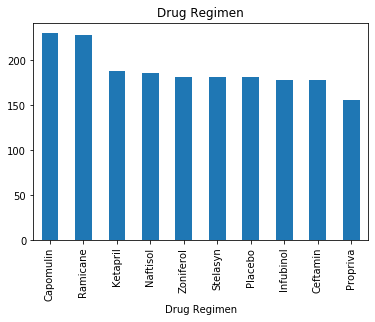

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
#using DataFrame.plot()

#sort the dataframe to alphabetical to match the sample provided.

counts = clean_df.groupby(by = 'Drug Regimen').size().sort_values(ascending=False)
counts.plot.bar(title='Drug Regimen')

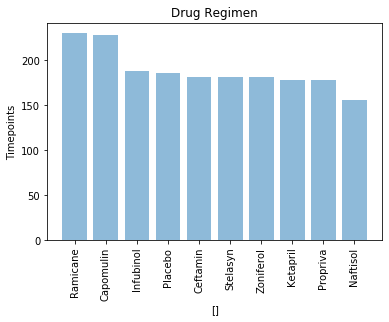

In [58]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Using pyplot

objects = clean_df['Drug Regimen'].unique().tolist()
y_pos = np.arange(len(objects))

counts = clean_df.groupby(by = 'Drug Regimen').size().sort_values(ascending=False)
xlabels = counts.axes[1:10] # this didn't change the order...?

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)

plt.xlabel(xlabels) # why doesn't the order change?
plt.ylabel('Timepoints')
plt.title('Drug Regimen')

plt.show()




## Pie Plots

In [44]:
type(counts)


pandas.core.series.Series

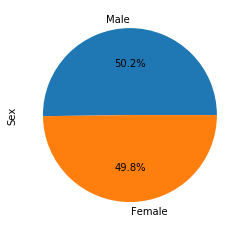

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# basically we'll count the number male or female with unique mouse IDs.
unique_mice_df = clean_df.drop_duplicates('Mouse ID')

labels = ['Male','Female']

unique_mice_df.Sex.value_counts().plot(kind='pie', y='Sex', labels=labels, autopct="%1.1f%%")

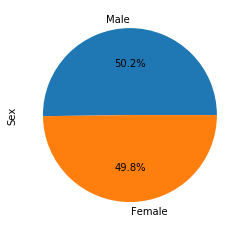

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique_mice_df = clean_df.drop_duplicates('Mouse ID')


unique_mice_df.Sex.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# check to see what the final timepoint for each mouse is.
clean_df.groupby(by = 'Timepoint').size()

# hmm. only 130 make it to Timepoint 45. 


Timepoint
0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
dtype: int64

In [16]:
# So we check for duplicate Mouse ID and keep the first timepoint record for the mouse.
start_size_df=clean_df.drop_duplicates('Mouse ID', keep='first')

# rename the tumor volume to start volume
start_size_df.rename(columns = {'Tumor Volume (mm3)':'Start Volume'}, inplace=True)
#start_size_df.columns
#print(len(start_size_df['Tumor Volume (mm3)']))

# check for dupes again, keeping only the last timepoint for the mouse.
final_result_df=clean_df.drop_duplicates('Mouse ID', keep='last')

# We only need a dataframe with the mouse ID and tumor volume
final_result_df = final_result_df.loc[:,['Mouse ID','Tumor Volume (mm3)']]
#final_result_df

# let's rename the tumor volume to final volume
final_result_df.rename(columns = {'Tumor Volume (mm3)':'Final Volume'}, inplace = True)
#final_result_df

# merge the two together
start_final_df = start_size_df.merge(final_result_df, on='Mouse ID')
#start_final_df.describe()

In [17]:
# create a column to hold the change in volume. The most positive is best.

start_final_df['Volume Change'] = start_final_df['Start Volume'] - start_final_df['Final Volume']
start_final_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Start Volume,Metastatic Sites,Final Volume,Volume Change
0,k403,Ramicane,Male,21,16,0,45.0,0,22.050126,22.949874
1,s185,Capomulin,Female,3,17,0,45.0,0,23.343598,21.656402
2,x401,Capomulin,Female,16,15,0,45.0,0,28.484033,16.515967
3,m601,Capomulin,Male,22,17,0,45.0,0,28.430964,16.569036
4,g791,Ramicane,Male,11,16,0,45.0,0,29.128472,15.871528
...,...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0,45.934712,-0.934712
245,z435,Propriva,Female,12,26,0,45.0,0,48.710661,-3.710661
246,z581,Infubinol,Female,24,25,0,45.0,0,62.754451,-17.754451
247,z795,Naftisol,Female,13,29,0,45.0,0,65.741070,-20.741070


In [42]:
# group by drug
drug2_group = start_final_df.groupby('Drug Regimen')

# find the 4 best ones with the smallest average final turmor volume
drug2_group['Final Volume'].mean().sort_values(ascending=True)

#drug2_group['Volume Change'].mean().sort_values(ascending=False)

##### Note, the sample shows Infubinol and not Propriva. Not sure how they came to that conclusion. 
##### for both final volume and change in volume, Propriva is better.

Drug Regimen
Ramicane     36.191390
Capomulin    36.667568
Propriva     56.736964
Ceftamin     57.753977
Infubinol    58.178246
Zoniferol    59.181258
Placebo      60.508414
Stelasyn     61.001707
Naftisol     61.205757
Ketapril     62.806191
Name: Final Volume, dtype: float64

In [19]:
# from the previous result, we see Ramicane, Capomulin, Propriva and Ceftamin have best results. I'll put in Infubinol too.

# now for each drug, we calc IQR and quantiles based on the final results for each mouse.
ramicane_df = start_final_df.loc[start_final_df['Drug Regimen']=='Ramicane']
ramicane_Q1 = ramicane_df['Final Volume'].quantile(0.25)
ramicane_Q3 = ramicane_df['Final Volume'].quantile(0.75)
ramicane_IQR = ramicane_Q3 - ramicane_Q1
print("Ramicane")
print("---------")
print("Q1: ", ramicane_Q1)
print("Q3: ", ramicane_Q3)
print("IQR:", ramicane_IQR)
print()

capomulin_df = start_final_df.loc[start_final_df['Drug Regimen']=='Capomulin']
capomulin_Q1 = capomulin_df['Final Volume'].quantile(0.25)
capomulin_Q3 = capomulin_df['Final Volume'].quantile(0.75)
capomulin_IQR = capomulin_Q3 - capomulin_Q1
print("Capomulin")
print("---------")
print("Q1: ", capomulin_Q1)
print("Q3: ", capomulin_Q3)
print("IQR:", capomulin_IQR)
print()

propriva_df = start_final_df.loc[start_final_df['Drug Regimen']=='Propriva']
propriva_Q1 = propriva_df['Final Volume'].quantile(0.25)
propriva_Q3 = propriva_df['Final Volume'].quantile(0.75)
propriva_IQR = propriva_Q3 - propriva_Q1
print("Propriva")
print("---------")
print("Q1: ", propriva_Q1)
print("Q3: ", propriva_Q3)
print("IQR:", propriva_IQR)
print()

ceftamin_df = start_final_df.loc[start_final_df['Drug Regimen']=='Ceftamin']
ceftamin_Q1 = ceftamin_df['Final Volume'].quantile(0.25)
ceftamin_Q3 = ceftamin_df['Final Volume'].quantile(0.75)
ceftamin_IQR = ceftamin_Q3 - ceftamin_Q1
print("Ceftamin")
print("---------")
print("Q1: ", ceftamin_Q1)
print("Q3: ", ceftamin_Q3)
print("IQR:", ceftamin_IQR)
print()

infubinol_df = start_final_df.loc[start_final_df['Drug Regimen']=='Infubinol']
infubinol_Q1 = infubinol_df['Final Volume'].quantile(0.25)
infubinol_Q3 = infubinol_df['Final Volume'].quantile(0.75)
infubinol_IQR = infubinol_Q3 - infubinol_Q1
print("Infubinol")
print("---------")
print("Q1: ", infubinol_Q1)
print("Q3: ", infubinol_Q3)
print("IQR:", infubinol_IQR)

Ramicane
---------
Q1:  31.56046955
Q3:  40.65900627
IQR: 9.098536719999998

Capomulin
---------
Q1:  32.37735684
Q3:  40.1592203
IQR: 7.781863460000004

Propriva
---------
Q1:  49.12296898
Q3:  62.57087961
IQR: 13.447910629999996

Ceftamin
---------
Q1:  48.72207785
Q3:  64.29983003
IQR: 15.577752179999997

Infubinol
---------
Q1:  54.04860769
Q3:  65.52574285
IQR: 11.477135160000003


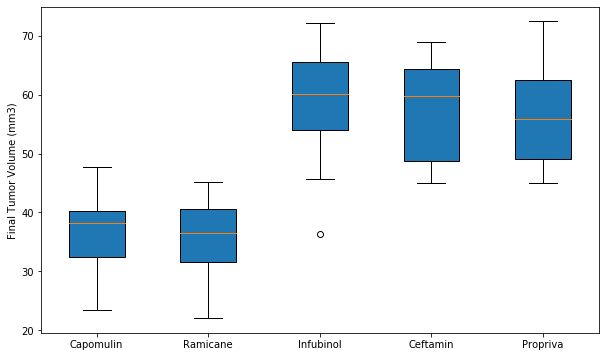

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four, er.. five regimens of interest

# Create arrays of data
ramicane_tumor_list = ramicane_df['Final Volume'].values.tolist()
capomulin_tumor_list = capomulin_df['Final Volume'].values.tolist()
infubinol_tumor_list = infubinol_df['Final Volume'].values.tolist()
ceftamin_tumor_list = ceftamin_df['Final Volume'].values.tolist()
propriva_tumor_list = propriva_df['Final Volume'].values.tolist()


# Set a size.
fig, ax1 = plt.subplots(figsize=(10,6))

# y-axis label
ax1.set_ylabel('Final Tumor Volume (mm3)')

box_plot_data=[capomulin_tumor_list, ramicane_tumor_list, infubinol_tumor_list, ceftamin_tumor_list, propriva_tumor_list ]

plt.boxplot(box_plot_data,patch_artist=True,labels=['Capomulin','Ramicane', 'Infubinol','Ceftamin','Propriva' ])

plt.show()


## Line and Scatter Plots

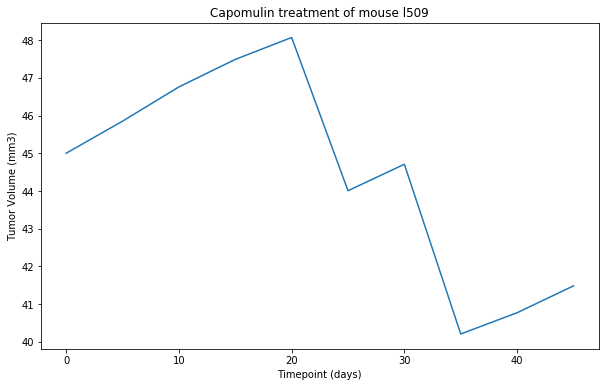

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#We'll use Mouse ID l509
mouse_l509_df = clean_df[clean_df['Mouse ID'] == 'l509']

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Timepoint (days)')
ax1.set_title('Capomulin treatment of mouse l509')

plt.plot(mouse_l509_df['Timepoint'], mouse_l509_df['Tumor Volume (mm3)'])



In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_df =clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#Calculate average tumor volume per mouse and create a df of results
avg_df = scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().to_frame()

#create df of weights
weight_df = mouse_metadata_df[['Mouse ID','Weight (g)']]

#inner join them
scatter_source_df = pd.merge(avg_df, weight_df, how='inner', on='Mouse ID')
scatter_source_df

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


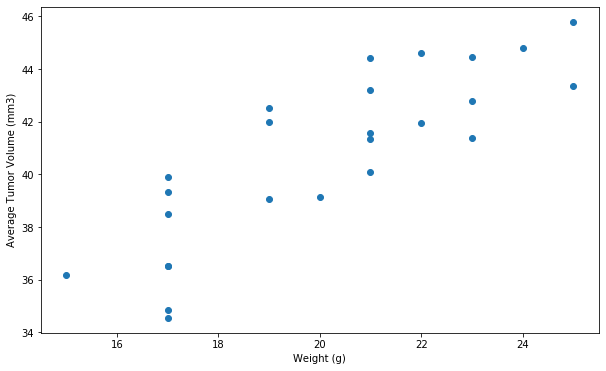

In [22]:


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Weight (g)')
     
plt.scatter(scatter_source_df['Weight (g)'], scatter_source_df['Tumor Volume (mm3)'])

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#using scatter_source_df from before...
scatter_source_df.corr(method='pearson')

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000


In [25]:
## Commented this all out to use the scipy library instead.

#x = scatter_source_df.iloc[:,2].values.reshape(-1,1)
#y = scatter_source_df.iloc[:,1].values.reshape(-1,1)

#linear_regressor = LinearRegression()

#linear_regressor.fit(x, y)
#Y_pred = linear_regressor.predict(x)
#Y_pred = linear_regressor.predict(scatter_source_df['Tumor Volume (mm3)'])

The r-squared is:  0.8419363424694718


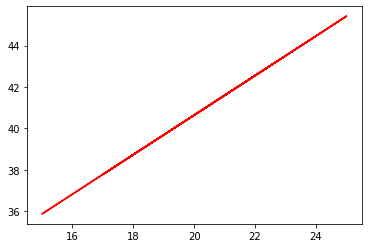

In [36]:
#Get the linear regression\n,
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_source_df['Weight (g)'], scatter_source_df['Tumor Volume (mm3)'])

Y_pred = (slope * scatter_source_df['Weight (g)']) + intercept

print('The r-squared is: ',r_value)

#Plot the linear regression
plt.plot(scatter_source_df['Weight (g)'], Y_pred, color = 'red')

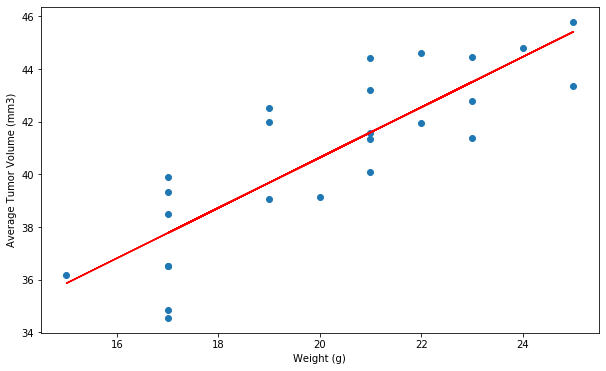

In [37]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Weight (g)')

plt.scatter(x,y)
plt.plot(scatter_source_df['Weight (g)'],Y_pred, color = 'red')

plt.show()